In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.basemap import Basemap,shiftgrid
% matplotlib inline

In [2]:
ptrc=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/result/ENG319582008.nc')
ptrchv=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/sensitivity_exp_hv/hv19791996.nc')

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

In [3]:
#th concentration in 2005


elat=np.array([83.114,   87.623  ]) #     83°06.826 87°37.375 N  
elon=np.array([-174.88,  156.09  ]) #   174°52.689W 156°05.581 E

y0=np.array([20.1,100.0,292.5,491.3,691.5,1091.5,1290.9,1491.4,1691.5,1891.1,2092.1,2290.9,2480.4,2692.2])
x0=np.array([0.23097531,0.3115801186,0.5066939254,0.6922778619,0.6283046556,0.7627209815,0.7814033969,
    1.0046730342,0.9339497418,1.096588395,1.1791569817,1.2986671687,1.3412285366,1.6945276994])

y1=np.array([2.2,20.5,127.0,258.2,408.8,610.4,913.6,1217.6,1523.3,1830.4,
 2138.6,2441.3,2752.3,3062.9,3720.8,4028.6])
x1=np.array([0.2408122073,0.2612594506,0.4828673279,0.9891112582,0.7759438555,0.8382833503,0.9810394531,
 1.2535573266,1.5174676222,1.7516785761,1.9769771391,1.9348387143,1.9717981823,2.1756327796,2.4095804438,2.4280244504])

In [4]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
print("found *.csv file: \n{}".format(nc_filename))

found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total_r1.csv', '/ocean/xiaoxiny/research/data/total/Total_r2.csv', '/ocean/xiaoxiny/research/data/total/Total_r3.csv', '/ocean/xiaoxiny/research/data/total/Total_r4.csv', '/ocean/xiaoxiny/research/data/total/Total_r5.csv', '/ocean/xiaoxiny/research/data/total/Total_r6.csv']


In [5]:
yearnum= len(ptrc.variables['TR_8'][:,0,0,0])

In [7]:
def datasrckey1(i,a,b,key1='TR_8',key2='TR_10'):
    mdel = ptrc.variables[key1][i,:46,a,b]
    return mdel

def datasrc(i,a,b,key1='TR_8',key2='TR_10'):
    mdel = ptrc.variables[key1][i,:46,a,b]+ptrc.variables[key2][i,:46,a,b]
    return mdel

def datasrc_hv(i,a,b,key1='TR_8',key2='TR_10'):
    mdel = ptrchv.variables[key1][i,:46,a,b]+ptrc.variables[key2][i,:46,a,b]
    return mdel

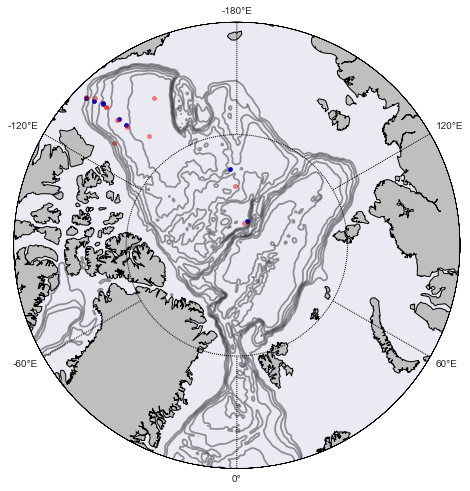

In [9]:
# IC for diss/part Pa

layer= 31

fig= plt.figure(figsize=(8,8))    
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
ex_lon,ey_lat = m(elon,elat)
m.scatter(ex_lon,ey_lat)
for j in range(len(nc_filename)):
    #read observation
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    Lon = data['long.'].values;
    Lat = data['lat.'].values;
    y_=[];x_=[];lon_=[];lat_=[];
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            lon_.append(lon[i]);lat_.append(lat[i])
    #2007
    if len(lon_)!=0:
        E_Lon,E_Lat = m(Lon[0],Lat[0])
        m.scatter(E_Lon,E_Lat)
# bathy
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
a=[250,223,303,302,295,295,285,280]
b=[290,305,152,160,170,170,180,190]
'try to find anothe location with low ice'
#a=[260,223,303+20,302+20,295+25,295,285,280]
#b=[285,305,152+30,160+25,170+20,170,180,190]
m.scatter(x_lon[a,b],y_lat[a,b],color='r',alpha=0.5)

ap=[265,275,305]
bp=[180,210,210]
m.scatter(x_lon[ap,bp],y_lat[ap,bp],color='r',alpha=0.5)

plt.show()

# Th on AR

In [8]:

def ana(xrange=4000,i=0.9):
    x=np.linspace(0,xrange,20)
    
    pth=0.0267/(-1115*i+1600)*x+0.03
    k  =-0.12*i+0.21
    dth=0.0267/k+0.5/k*pth

    ppa=0.00246/(-508*i+1616)*x+0.004
    k_pa=-0.055*i+0.082
    dpa=0.00246/k_pa+1.5/k_pa*ppa

    totalth=pth+dth
    totalpa=ppa+dpa
    return x,totalth, totalpa

In [9]:
def ana_realice(x,i):

    pth=0.0267/(-1115*i+1600)*x+0.03
    k  =-0.12*i+0.21
    dth=0.0267/k+0.5/k*pth

    ppa=0.00246/(-508*i+1616)*x+0.004
    k_pa=-0.055*i+0.082
    dpa=0.00246/k_pa+1.5/k_pa*ppa

    totalth=pth+dth
    totalpa=ppa+dpa
    return x,totalth, totalpa

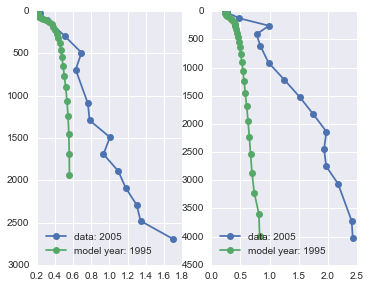

In [10]:
sns.set_style("darkgrid")
fig= plt.figure(figsize=(12,10))

ax=plt.subplot(2,4,1)
plt.plot(x0,y0,'o-',label='data: 2005')
for i in [1995-1958]:
    model=datasrc(i,a=a[0],b=b[0],key1='TR_8',key2='TR_10')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model year: %s'%(i+1958))

#ana
#x,totalth,totalpa= ana(xrange=2500,i=0.9)
#plt.plot(totalth,x)


plt.gca().invert_yaxis()
plt.legend(loc=3)

ax=plt.subplot(2,4,2)
plt.plot(x1,y1,'o-',label='data: 2005')
for i in [1995-1958]:
    model=datasrc(i,a=a[1],b=b[1],key1='TR_8',key2='TR_10')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model year: %s'%(i+1958))
    
    #model=datasrc_hv(i-20,a=a[1],b=b[1],key1='TR_8',key2='TR_10')
    #model=np.ma.masked_where(model<=1e-3,model)
    #plt.plot(model,dep[:46],label='twin run: %s'%(i+1958))

#ana
#x,totalth,totalpa= ana(xrange=3250,i=1.0)
#plt.plot(totalth,x)

plt.gca().invert_yaxis()
plt.legend(loc=3)

* surface looks good. But bottom is not.

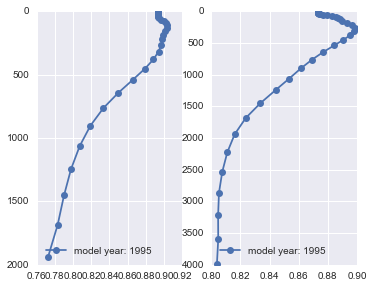

In [14]:
# Th ice
fig= plt.figure(figsize=(12,10))

ax=plt.subplot(2,4,1)
#plt.plot(x0,y0,'o-',label='data: 2005')
for i in [1995-1958]:
    model=datasrckey1(i,a=a[0],b=b[0],key1='TR_12')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model year: %s'%(i+1958))


plt.gca().invert_yaxis()
plt.legend(loc=3)

ax=plt.subplot(2,4,2)
#plt.plot(x1,y1,'o-',label='data: 2005')
for i in [1995-1958]:
    model=datasrckey1(i,a=a[1],b=b[1],key1='TR_12')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model year: %s'%(i+1958))
    
plt.gca().invert_yaxis()
plt.legend(loc=3)

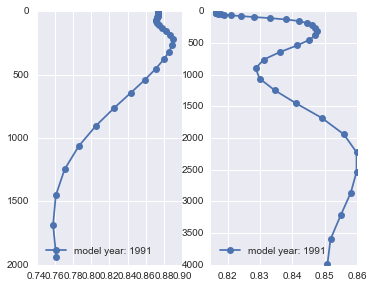

In [13]:
# Th ice
fig= plt.figure(figsize=(12,10))

ax=plt.subplot(2,4,1)
#plt.plot(x0,y0,'o-',label='data: 2005')
for i in [1991-1958]:
    model=datasrckey1(i,a=a[0],b=b[0],key1='TR_12')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model year: %s'%(i+1958))


plt.gca().invert_yaxis()
plt.legend(loc=3)

ax=plt.subplot(2,4,2)
#plt.plot(x1,y1,'o-',label='data: 2005')
for i in [1991-1958]:
    model=datasrckey1(i,a=a[1],b=b[1],key1='TR_12')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model year: %s'%(i+1958))
    
plt.gca().invert_yaxis()
plt.legend(loc=3)

# Th in CB

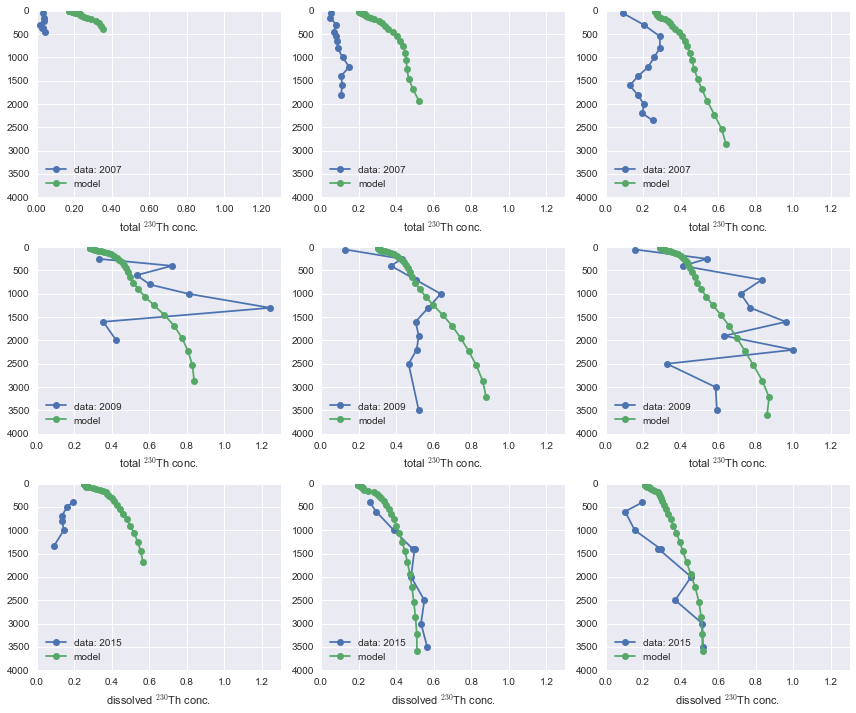

In [11]:
sns.set_style("darkgrid")
fig= plt.figure(figsize=(12,10))

#ax=plt.subplot(2,4,1)
#plt.plot(x0,y0,'o-',label='data: 2005')
#for i in [1978-1958]:
#    model=datasrc(i,a=a[0],b=b[0],key1='TR_8',key2='TR_10')
#    model=np.ma.masked_where(model<=1e-3,model)
#    plt.plot(model,dep[:46],label='model year: %s'%(i+1958))

#plt.gca().invert_yaxis()
#plt.legend(loc=3)

#ax=plt.subplot(2,4,2)
#plt.plot(x1,y1,'o-',label='data: 2005')
#for i in [1978-1958]:
#    model=datasrc(i,a=a[1],b=b[1],key1='TR_8',key2='TR_10')
#    model=np.ma.masked_where(model<=1e-3,model)
#    plt.plot(model,dep[:46],label='model year: %s'%(i+1958))
    
#plt.gca().invert_yaxis()
#plt.legend(loc=3)



for j in range(len(nc_filename)):
    #read observation
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    Lon = data['long.'].values;
    Lat = data['lat.'].values;
    
    ax=plt.subplot(3,3,j+1)
    y_=[];x_=[];Lon_=[];Lat_=[];
    ytemp_=[];xtemp_=[]
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            ytemp_.append(y[i]);xtemp_.append(x[i])
    #2007
    if j<3 and len(lon_)!=0:
        plt.plot(x_,y_,'-o',label='data: 2007')
        #model result
        for i in [1964-1958]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
            model=np.ma.masked_where(model<=1e-3,model)
            plt.plot(model,dep[:46],'o-',label='model')#: trough ')#year: %s'%(i+1958-1))     
    #2009         
    else:
        plt.plot(x_,y_,'-o',label='data: 2009')
        #model result
        for i in [1994-1958]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
            model=np.ma.masked_where(model<=1e-3,model)
            plt.plot(model,dep[:46],'o-',label='model')#: crest') #year: %s'%(i+1958-1))
    #analy
    #x,totalth0,totalpa= ana(xrange=3500,i=0.0)
    #plt.plot(totalth0,x)
    plt.xlabel('total $^{230}$Th conc.')
    plt.legend(loc=3)
    plt.ylim(0,4000)
    plt.xlim(0.0,1.3)
    plt.gca().invert_yaxis()
    if j==0:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
        
        
th230_cb2=[0.091,0.144,0.136,0.133,0.162,0.192]
pa231_cb2=[0.010,0.015,0.028,0.025,0.058,0.020]
depth_cb2=[1345,1000,800,700,500,400]
th230_cb3=[0.565,0.532,0.550,0.479,0.498,0.488,0.387,0.293,0.259]
pa231_cb3=[0.174,0.171,0.238,0.155,0.089,0.096,0.058,0.035,0.033]
depth_cb3=[3500,3000,2500,2000,1400,1400,1000,600,400]
th230_cb4=[0.519,0.516,0.371,0.456,0.282,0.293,0.156,0.104,0.197]
pa231_cb4=[0.169,0.240,0.104,0.133,0.085,0.088,0.060,0.048,0.049]
depth_cb4=[3500,3000,2500,2000,1400,1400,1000,600,400]
ap=[265,275,305]
bp=[180,210,190]
        
ax=plt.subplot(3,3,7)
plt.plot(th230_cb2,depth_cb2,'o-',label='data: 2015')
for i in [2002-1958]:
    model=datasrckey1(i,a=ap[0],b=bp[0],key1='TR_8')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')
#for i in [2007-1979]:
#    model=datasrchv(i,a=a[0],b=b[0],key1='TR_8')
#    model=np.ma.masked_where(model<=1e-3,model)
#    plt.plot(model,dep[:46],label='model year: %s'%(i+1958))

plt.legend(loc=3);plt.xlim(0.0,1.3);plt.ylim(0.0,4000)
plt.gca().invert_yaxis();plt.xlabel('dissolved $^{230}$Th conc.')

ax=plt.subplot(3,3,8)
plt.plot(th230_cb3,depth_cb3,'o-',label='data: 2015')
for i in [2007-1958]:
    model=datasrckey1(i,a=ap[1],b=bp[1],key1='TR_8')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model ')
    
#for i in [2002-1979]:
#    model=datasrchv(i,a=a[1],b=b[1],key1='TR_8')
#    model=np.ma.masked_where(model<=1e-3,model)
#    plt.plot(model,dep[:46],label='model year: %s'%(i+1958))

plt.legend(loc=3);plt.xlim(0.0,1.3);plt.ylim(0.0,4000)
plt.gca().invert_yaxis();plt.xlabel('dissolved $^{230}$Th conc.')

ax=plt.subplot(3,3,9)
plt.plot(th230_cb4,depth_cb4,'o-',label='data: 2015')
for i in [2007-1958]:
    model=datasrckey1(i,a=ap[2],b=bp[2],key1='TR_8')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model ')
    
#for i in [2002-1979]:
#    model=datasrchv(i,a=a[2],b=b[2],key1='TR_8')
#    model=np.ma.masked_where(model<=1e-3,model)
#    plt.plot(model,dep[:46],label='model year: %s'%(i+1958))
    
plt.legend(loc=3);plt.xlim(0.0,1.3);plt.ylim(0.0,4000)
plt.gca().invert_yaxis();plt.xlabel('dissolved $^{230}$Th conc.')
    
plt.tight_layout()

##### * The Canada Basin shows high values at early stage. That is caused by two reasons: first, the sea ice concentration at the earlier years are high (I guess our parameterization reflect the scavenging on the slope though. This can be confirmed by the fact that if I calculate the analytical solution with 0% sea ice concentration, the analytical solution fits the observation); second, currents at the surface goes in anti-cyclonic which carrying low particle concentration to the slope, resulting in lower values in scavenging rates and thus generating a high tracer concentration profile.

# Pa in CANADA BASIN

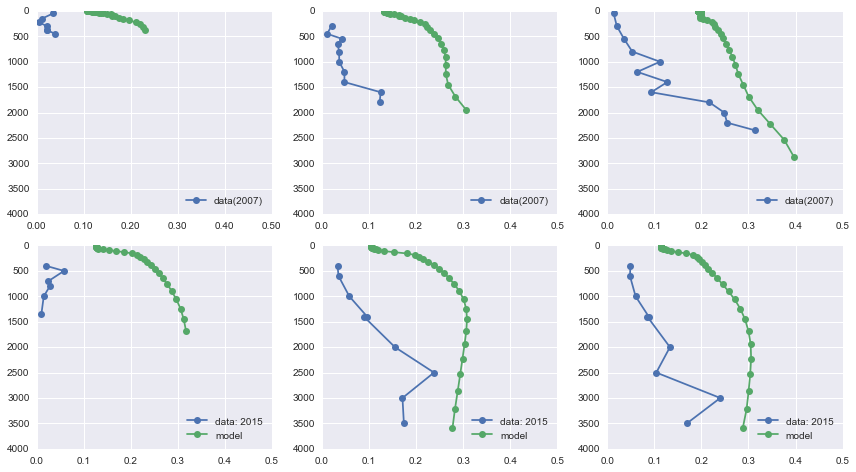

In [13]:
sns.set_style("darkgrid")
fig= plt.figure(figsize=(12,10/3*2))
for j in range(len(nc_filename)-3):
    #read observation
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['231 tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    
    ax=plt.subplot(2,3,j+1)
    y_=[];x_=[];lon_=[];lat_=[];
    ytemp_=[];xtemp_=[]
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            lon_.append(lon[i]);lat_.append(lat[i])
    #2007
    if j<3 and len(lon_)!=0:
        plt.plot(x_,y_,'-o',label='data(2007)')
        #model result
        for i in [1964-1958]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_7',key2='TR_9')
            model=np.ma.masked_where(model<=1e-3,model)
            plt.plot(model[:],dep[:46],marker='o')     
    #2009         
    plt.legend(loc=4)
    plt.xlim(0,0.5);plt.ylim(0,4000); plt.gca().invert_yaxis()
    if j==0:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
        
ax=plt.subplot(2,3,4)
plt.plot(pa231_cb2,depth_cb2,'o-',label='data: 2015')
for i in [2002-1958]:
    model=datasrckey1(i,a=ap[0],b=bp[0],key1='TR_7')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')

plt.legend(loc=4);plt.xlim(0.0,0.5);plt.ylim(0.0,4000)
plt.gca().invert_yaxis()


ax=plt.subplot(2,3,5)
plt.plot(pa231_cb3,depth_cb3,'o-',label='data: 2015')
for i in [2002-1958]:
    model=datasrckey1(i,a=ap[1],b=bp[1],key1='TR_7')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')
    
plt.legend(loc=4);plt.xlim(0.0,0.5);plt.ylim(0.0,4000)
plt.gca().invert_yaxis()


ax=plt.subplot(2,3,6)
plt.plot(pa231_cb4,depth_cb4,'o-',label='data: 2015')
for i in [2007-1958]:
    model=datasrckey1(i,a=ap[2],b=bp[2],key1='TR_7')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')


plt.legend(loc=4);plt.xlim(0.0,0.5);plt.ylim(0.0,4000)
plt.gca().invert_yaxis()
 
        
plt.tight_layout()

/home/xiaoxiny/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


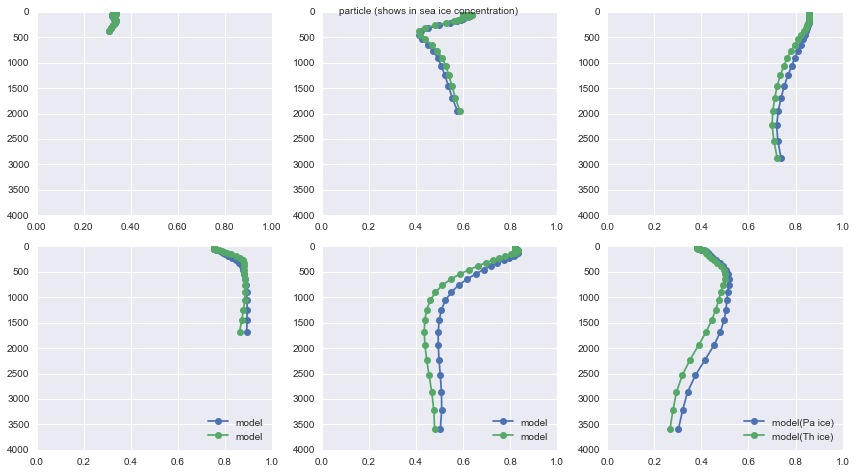

In [54]:
sns.set_style("darkgrid")

fig= plt.figure(figsize=(12,10/3*2))
for j in range(len(nc_filename)-3):
    ax=plt.subplot(2,3,j+1)
    for i in [1964-1958]:
        model=datasrckey1(i,a=a[j+2],b=b[j+2],key1='TR_11')
        model=np.ma.masked_where(model<=1e-3,model)
        plt.plot(model[:],dep[:46],marker='o')  
        model=datasrckey1(i,a=a[j+2],b=b[j+2],key1='TR_12')
        model=np.ma.masked_where(model<=1e-3,model)
        plt.plot(model[:],dep[:46],marker='o')    
    #2009         
    plt.legend(loc=4)
    plt.xlim(0,1.0);plt.ylim(0,4000); plt.gca().invert_yaxis()
    if j==0:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
        
ax=plt.subplot(2,3,4)
for i in [2002-1958]:
    model=datasrckey1(i,a=ap[0],b=bp[0],key1='TR_11')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')
    model=datasrckey1(i,a=ap[0],b=bp[0],key1='TR_12')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')

plt.legend(loc=4);plt.xlim(0.0,1.0);plt.ylim(0.0,4000)
plt.gca().invert_yaxis()


ax=plt.subplot(2,3,5)
for i in [2002-1958]:
    model=datasrckey1(i,a=ap[1],b=bp[1],key1='TR_11')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')
    model=datasrckey1(i,a=ap[1],b=bp[1],key1='TR_12')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model')
    
plt.legend(loc=4);plt.xlim(0.0,1.0);plt.ylim(0.0,4000)
plt.gca().invert_yaxis()


ax=plt.subplot(2,3,6)
for i in [2007-1958]:
    model=datasrckey1(i,a=ap[2],b=bp[2],key1='TR_11')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model(Pa ice)')
    model=datasrckey1(i,a=ap[2],b=bp[2],key1='TR_12')
    model=np.ma.masked_where(model<=1e-3,model)
    plt.plot(model,dep[:46],'o-',label='model(Th ice)')


plt.legend(loc=4);plt.xlim(0.0,1.0);plt.ylim(0.0,4000)
plt.gca().invert_yaxis()
 
        
plt.tight_layout()
plt.suptitle('particle (shows in sea ice concentration)')

In [13]:
# histogram

In [202]:
def interp(obsdep_input,dep_input,model_input,allmdel,modeldepth):
    '''This function aims at load observation data and model result, 
    interpo. model result on the dep of observation,
    then return the interpo. model result to new array'''
    for num in range (len(dep[:])-6):
                if dep_input[num]<obsdep_input and dep_input[num+1]>obsdep_input:
                    if model_input[num+1] != 0:
                        dX=dep_input[num+1]-dep_input[num]
                        dY=model_input[num+1]-model_input[num]
                        dx=obsdep_input-dep_input[num]
                        dy=dx/dX*dY+model_input[num]
                        
                        allmdel.append(dy)
                        modeldepth.append(obsdep)
    return allmdel,modeldepth

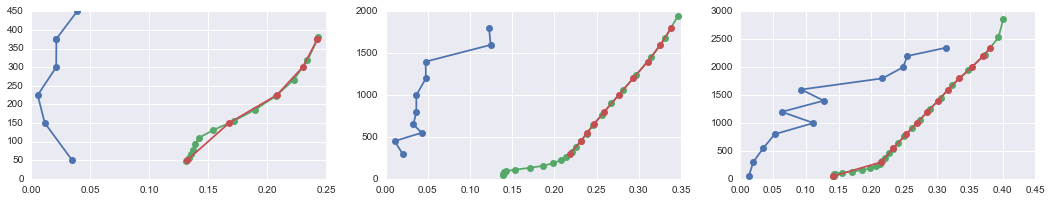

In [203]:
fig=plt.figure(figsize=(18,3))
# test interpolation function

for j in range(len(nc_filename)-3):
    plt.subplot(1,3,j+1)
    y_=[];x_=[];lon_=[];lat_=[]
    #read observation
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['231 tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            ytemp_.append(y[i]);xtemp_.append(x[i])
    plt.plot(x_,y_,'-o')        
    allmdel=[]       
    modeldepth=[] 
    for i in [1979-1958]:
        model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_7',key2='TR_9')
        
        for j in range (17,44):
                if model[j]!=0:
                    allmdel.append(model[j])
                    modeldepth.append(dep[j])
        
        
        # plot model function
        plt.plot(allmdel,modeldepth,'-o') 
        
        
        allmdel=[] 
        modeldepth=[] 
        for j in range (len(x_)):
            #interpolation
            obsdep=y_[j]
            allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)
    # examinate interpolation
    plt.plot(allmdel,modeldepth,'-o')

In [204]:
# Pa in CB

In [205]:
y_=[];x_=[];lon_=[];lat_=[]
allmdel=[];modeldepth=[] 


for j in range(len(nc_filename)-3):
    
    #read observation
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['231 tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    
    
    ytemp_=[];xtemp_=[]
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            ytemp_.append(y[i]);xtemp_.append(x[i])
            

    for i in [1979-1958]:
        model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_7',key2='TR_9')
        
        

        for j in range (len(x_)):
            #interpolation
            obsdep=y_[j]
            allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)

In [206]:
data1pa=np.array((x_,y_))
data2pa=np.array((allmdel[:],modeldepth))

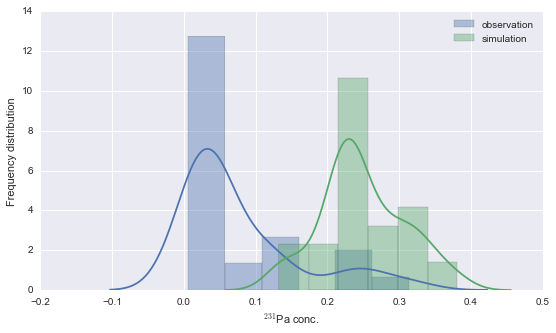

In [207]:
fig= plt.figure(figsize=(9,5))
sns.distplot(data1pa[0,:],label='observation');
sns.distplot(data2pa[0,:],bins=6,label='simulation');
plt.xlabel('$^{231}$Pa conc.')
plt.ylabel('Frequency distribution')
plt.legend()

# Th in CANADA BASIN

In [208]:
y_=[];x_=[];lon_=[];lat_=[]
allmdel=[];modeldepth=[] 
for j in range(len(nc_filename)):
    #read observation
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    
    ytemp_=[];xtemp_=[]
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            ytemp_.append(y[i]);xtemp_.append(x[i])
               
    if j <3:
        for i in [1979-1958]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
            for j in range (len(x_)):
            #interpolation
                obsdep=y_[j]
                allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)
    else:
        for i in [1995-1958]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
            for j in range (len(x_)):
            #interpolation
                obsdep=y_[j]
                allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)

In [209]:
data1th=np.array((x_,y_))
data2th=np.array((allmdel[:],modeldepth))

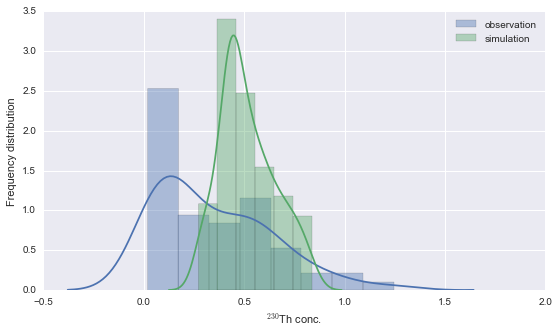

In [210]:
fig= plt.figure(figsize=(9,5))
sns.distplot(data1th[0,:],bins=8,label='observation');
sns.distplot(data2th[0,:],bins=6,label='simulation');
plt.xlabel('$^{230}$Th conc.')
plt.ylabel('Frequency distribution')
plt.legend()

# Pa and Th in CB

In [235]:
# define function for interannual plot. hoping to find the right year
def thhist(yearnum,ax):
        y_=[];x_=[];
        allmdel=[];modeldepth=[] 
        
        for j in range(len(nc_filename)):
            #read observation
            data=pd.read_csv(nc_filename[j])
            y= data['depth'].values;
            x=data['230Th tot.'].values;
            lon = data['long.'].values;
            lat = data['lat.'].values;
            
            ytemp_=[];xtemp_=[]
            for i in range (len(x)):
                if x[i]>=0:
                    y_.append(y[i]);x_.append(x[i])
                    ytemp_.append(y[i]);xtemp_.append(lat[i])
                    
            if j <3:
                for i in [yearnum]:
                    model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
                    for k in range (len(xtemp_)):
                    #interpolation
                        obsdep=ytemp_[k]
                        allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)
            else:
                for i in [yearnum+2]: # add two more because of the data collected date
                    model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
                    for k in range (len(xtemp_)):
                    #interpolation
                        obsdep=ytemp_[k]
                        allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)
                        
                    #print (len(allmdel),len(y_))

        data1th=np.array((x_,y_))
        data2th=np.array((allmdel[:],modeldepth))
        print (data1th[0,:].shape,data2th[0,:].shape)

        #fig= plt.figure(figsize=(9,5))
        sns.distplot(data1th[0,:],bins=8,label='observation',ax=ax);
        sns.distplot(data2th[0,:],bins=6,label='simulation',ax=ax);
        #plt.scatter(data1th[0,:len(data2th[0,:])],data2th[0,:])
        plt.xlabel('$^{230}$Th conc.')
        plt.ylabel('Frequency distribution')
        plt.title(yearnum+1958)
        plt.legend()
        return ax
    
    
def pahist(yearnum,ax):
    y_=[];x_=[];
    allmdel=[];modeldepth=[] 
    
    for j in range(len(nc_filename)-3):
        #read observation
        data=pd.read_csv(nc_filename[j])
        y= data['depth'].values;
        x=data['231 tot.'].values;
        lon = data['long.'].values;
        lat = data['lat.'].values;
        
        ytemp_=[];xtemp_=[]
        for i in range (len(x)):
            if x[i]>=0:
                y_.append(y[i]);x_.append(x[i])
                ytemp_.append(y[i]);xtemp_.append(x[i])


        for i in [yearnum]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_7',key2='TR_9')



            for k in range (len(xtemp_)):
                #interpolation
                obsdep=ytemp_[k]
                allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)
                
    data1pa=np.array((x_,y_))
    data2pa=np.array((allmdel[:],modeldepth))
    
    #fig= plt.figure(figsize=(9,5))
    sns.distplot(data1pa[0,:],label='observation',ax=ax);
    sns.distplot(data2pa[0,:],bins=6,label='simulation',ax=ax);
    #plt.scatter(data1pa[0,:len(data2pa[0,:])],data2pa[0,:])
    plt.xlabel('$^{231}$Pa conc.')
    plt.ylabel('Frequency distribution')
    plt.title(yearnum+1958)
    plt.legend()

    return ax


In [236]:
# Pa and Th in CB

(62,) (61,)


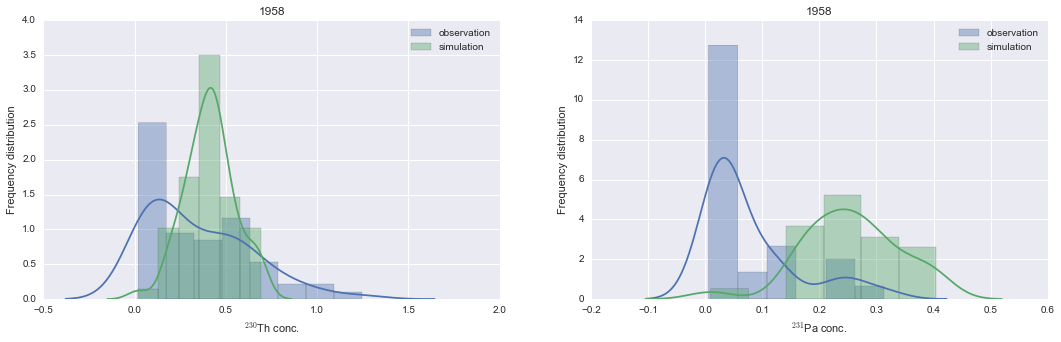

(62,) (60,)


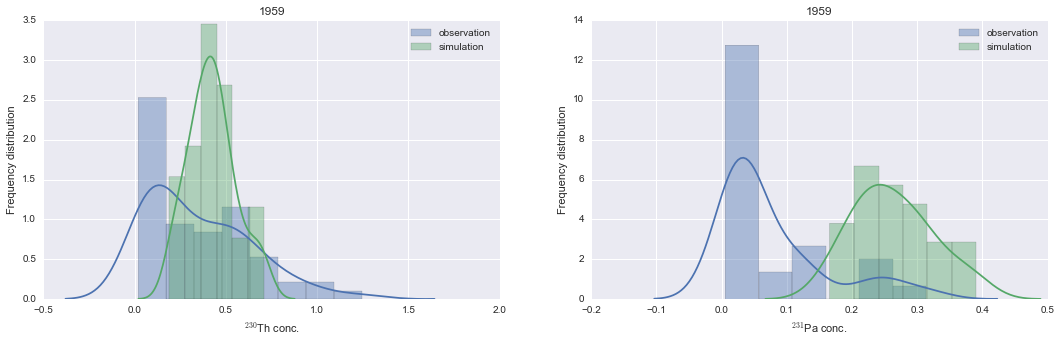

(62,) (60,)


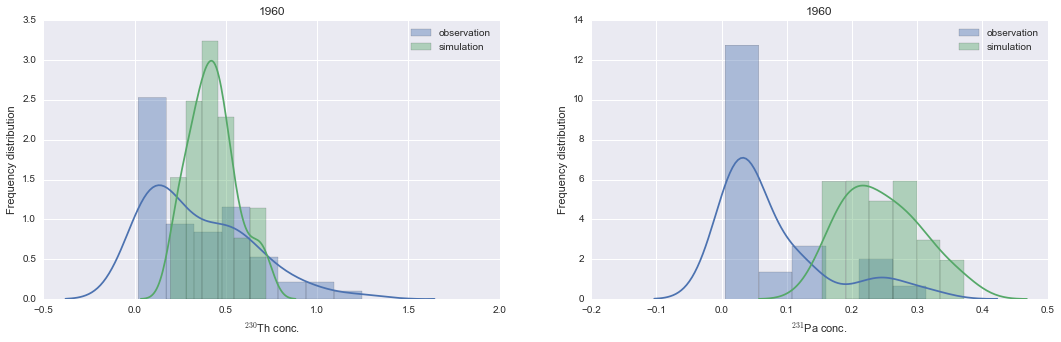

(62,) (60,)


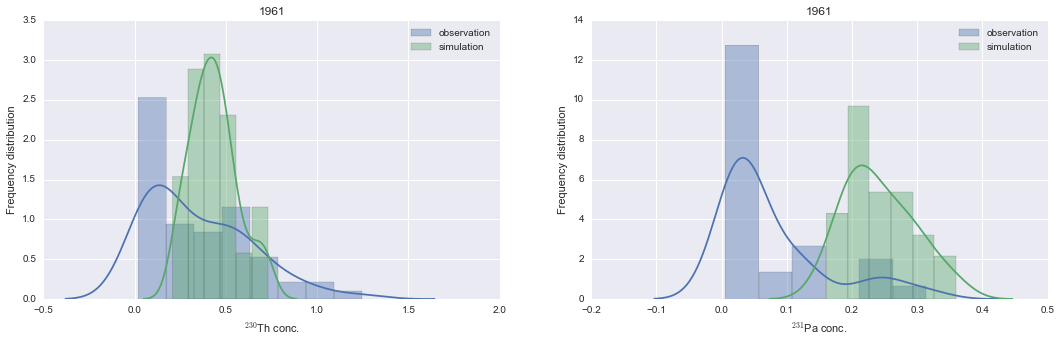

(62,) (60,)


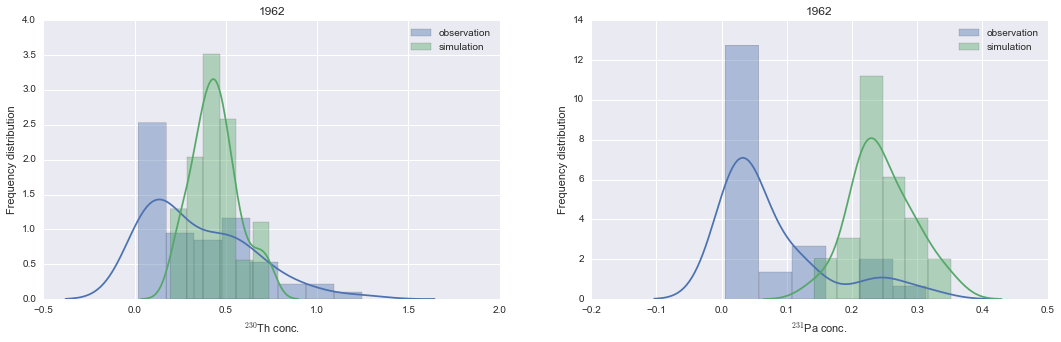

(62,) (60,)


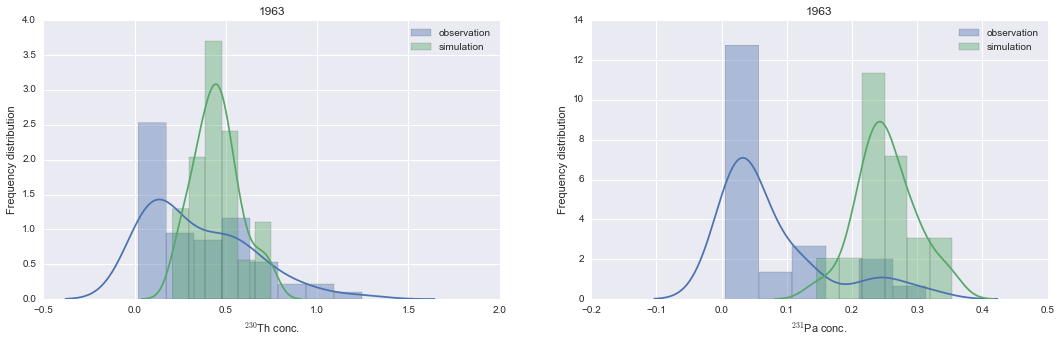

(62,) (60,)


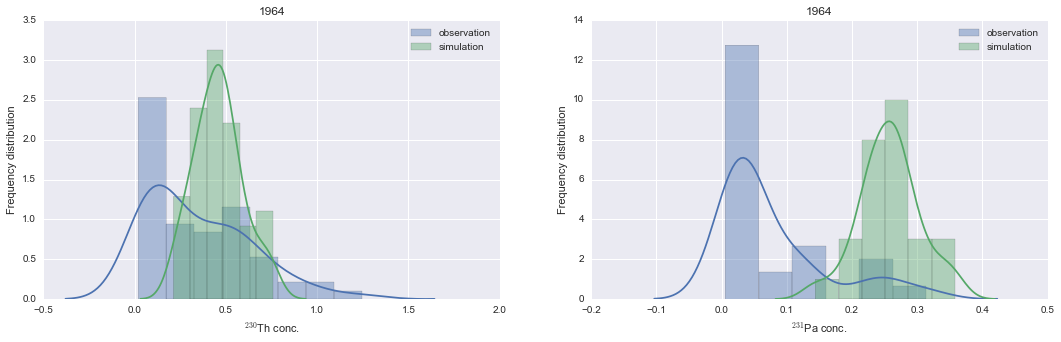

(62,) (60,)


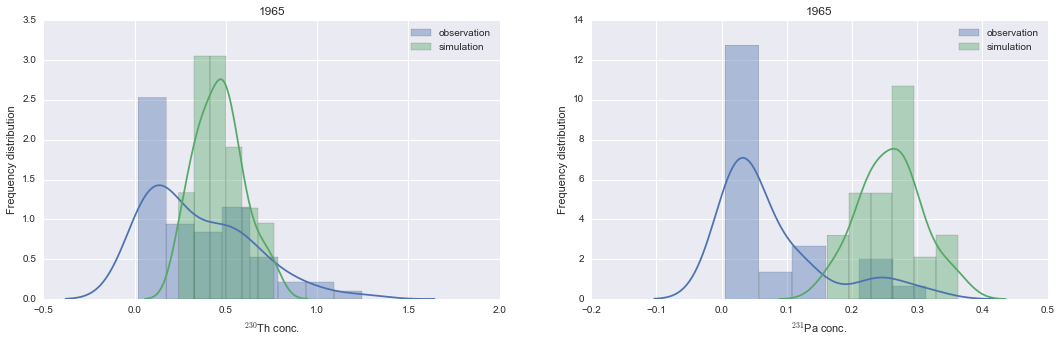

(62,) (60,)


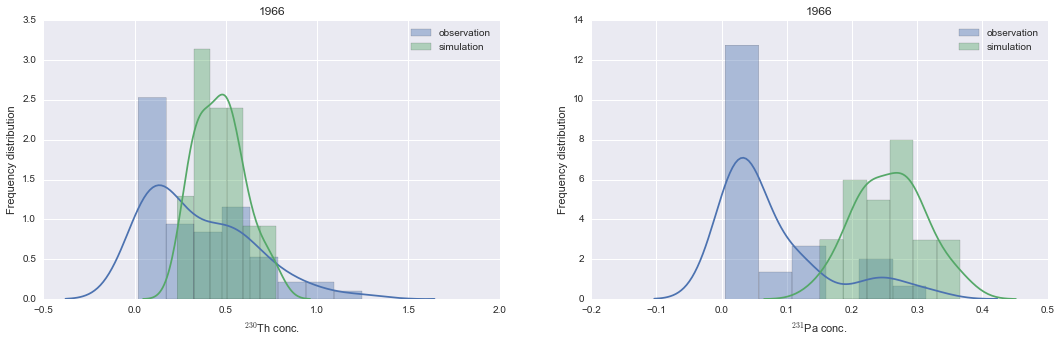

(62,) (60,)


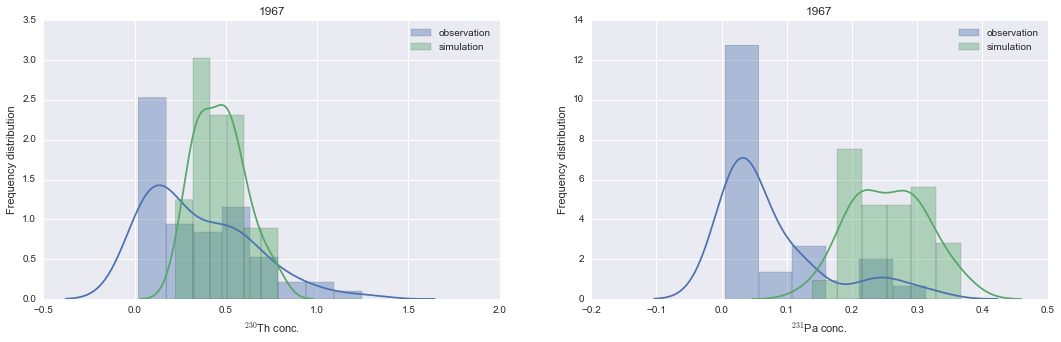

(62,) (60,)


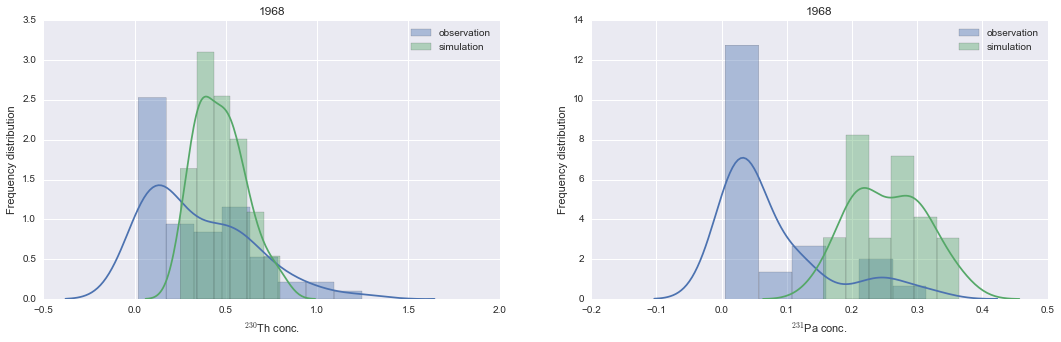

(62,) (60,)


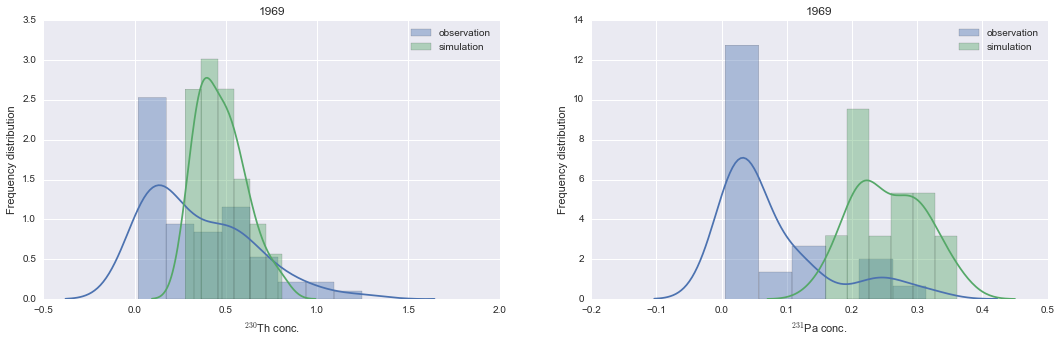

(62,) (60,)


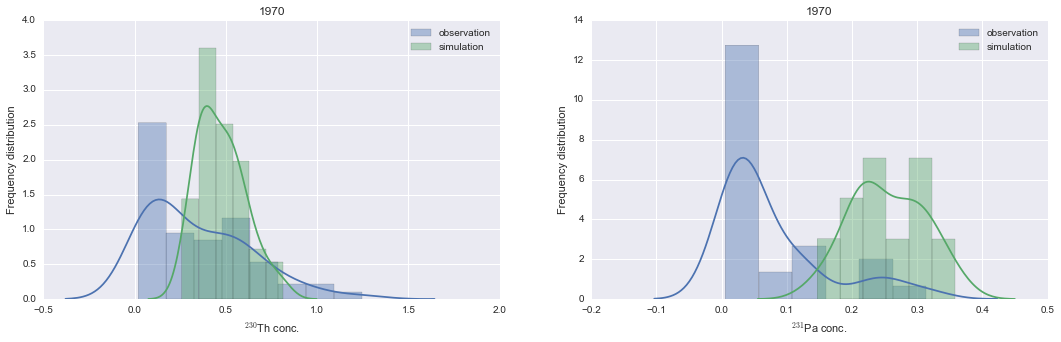

(62,) (60,)


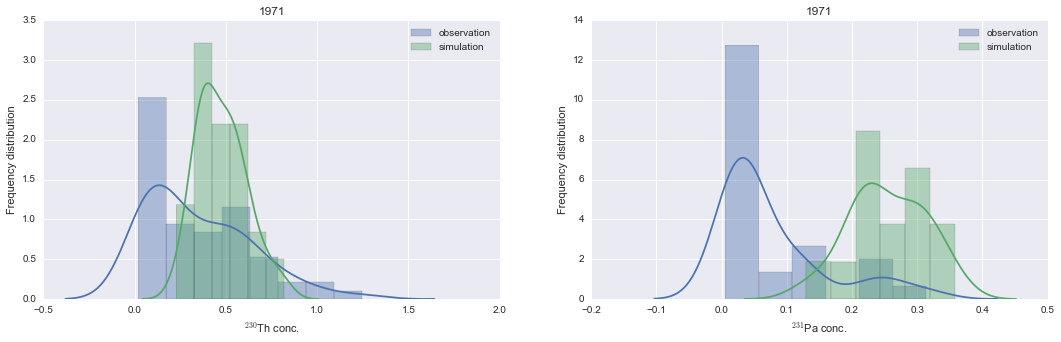

(62,) (60,)


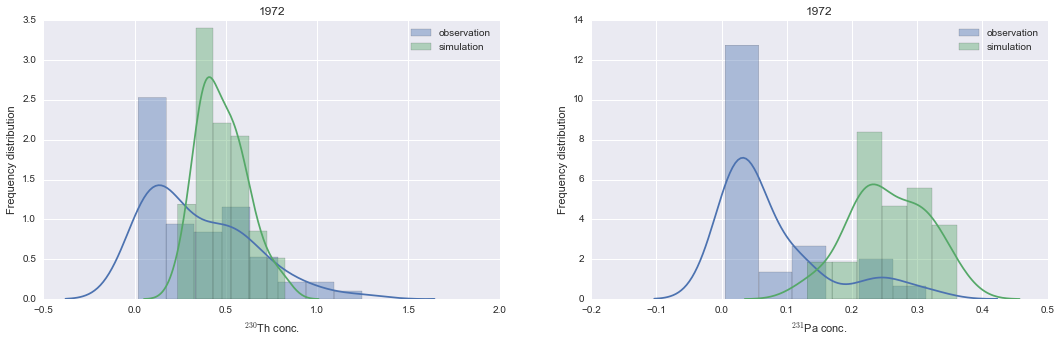

(62,) (60,)


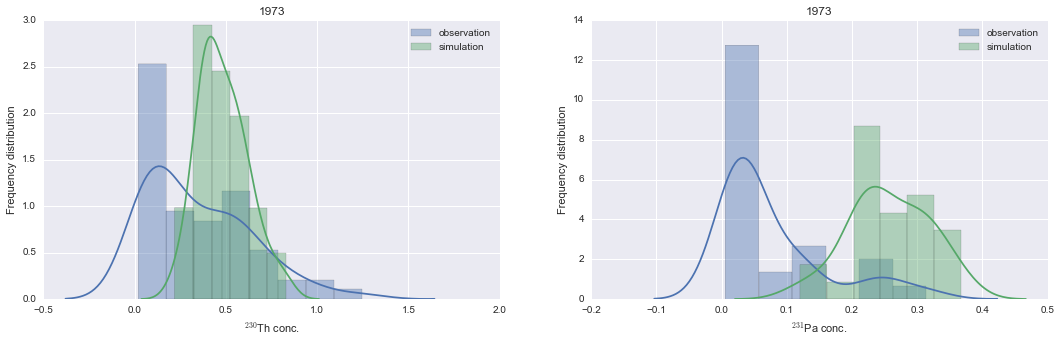

(62,) (60,)


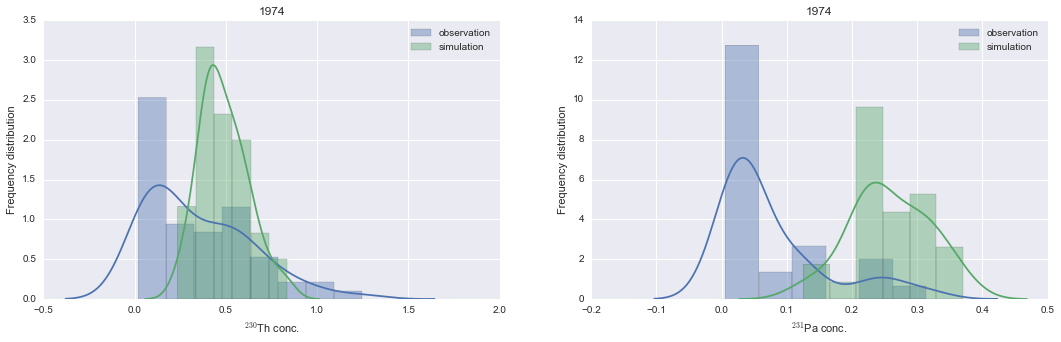

(62,) (60,)


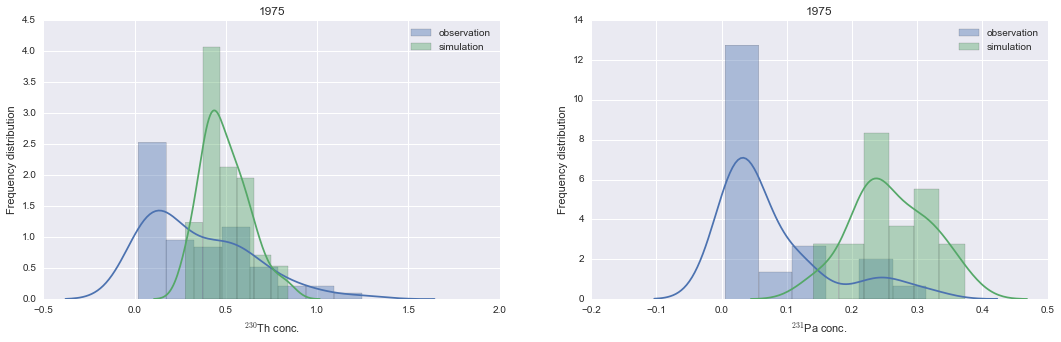

(62,) (60,)


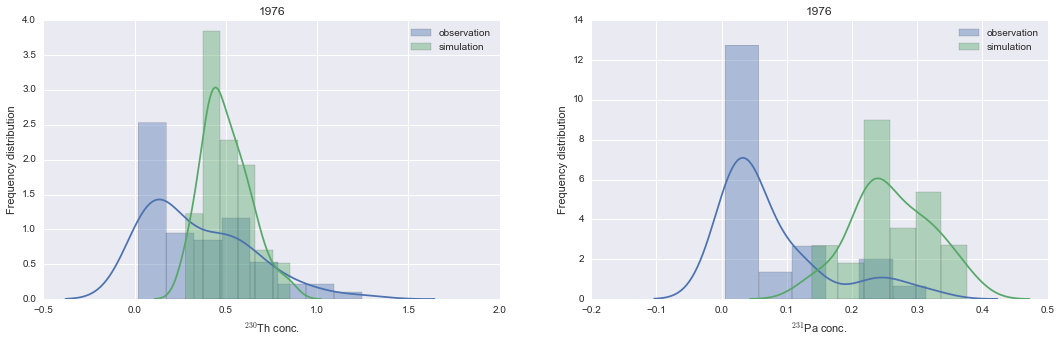

(62,) (60,)


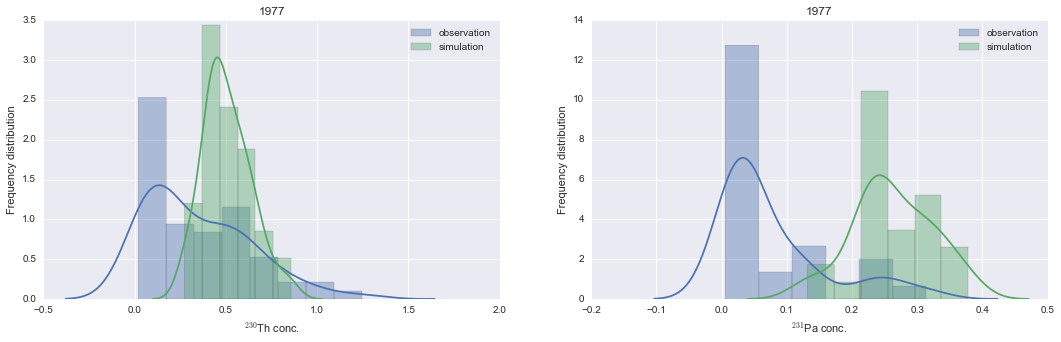

(62,) (60,)


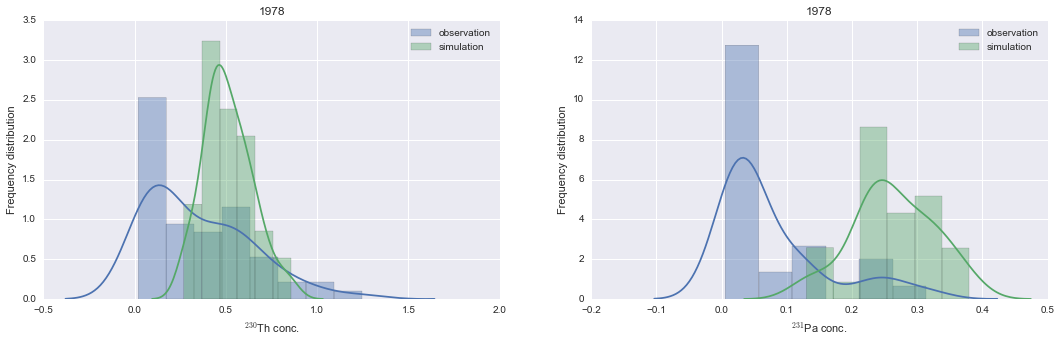

(62,) (60,)


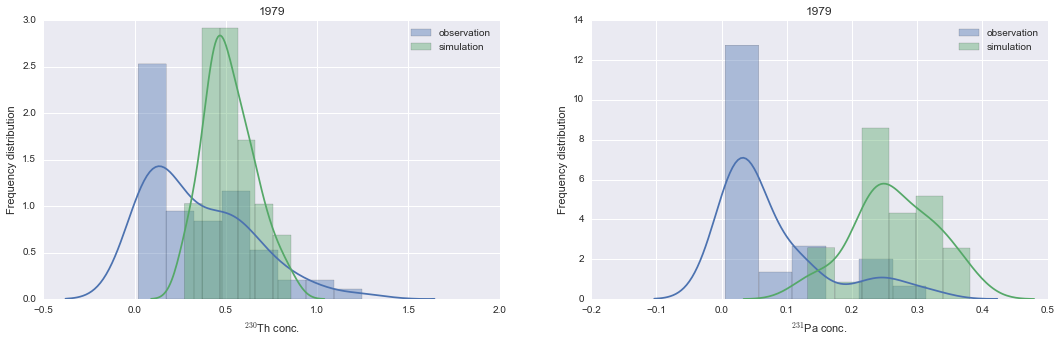

(62,) (60,)


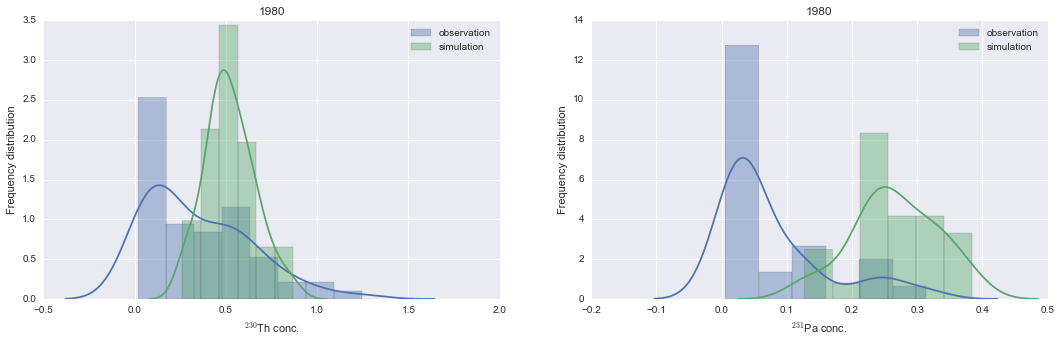

(62,) (60,)


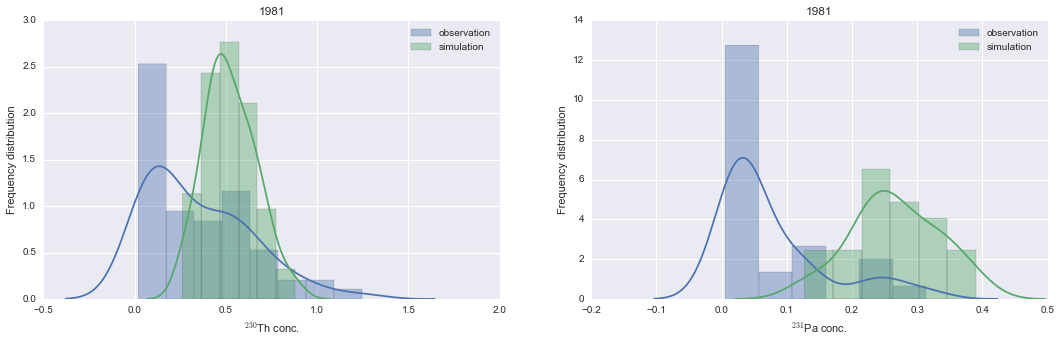

(62,) (60,)


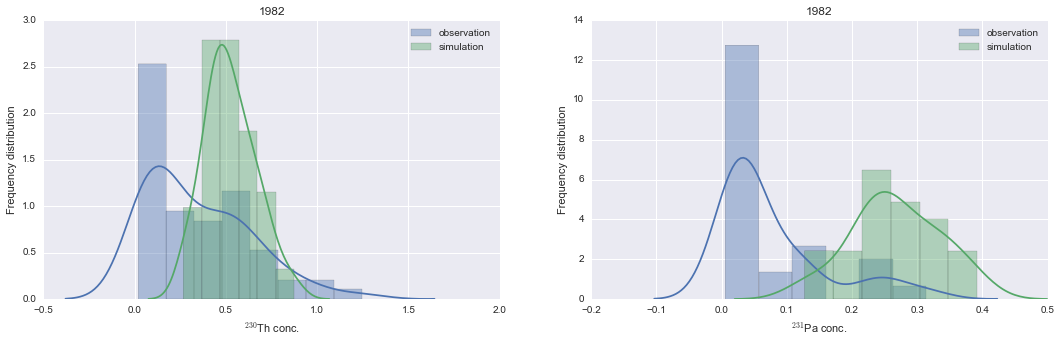

(62,) (60,)


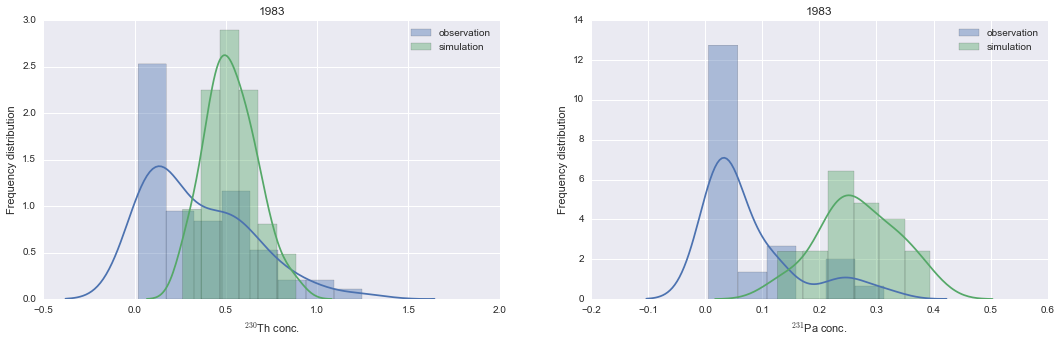

(62,) (60,)


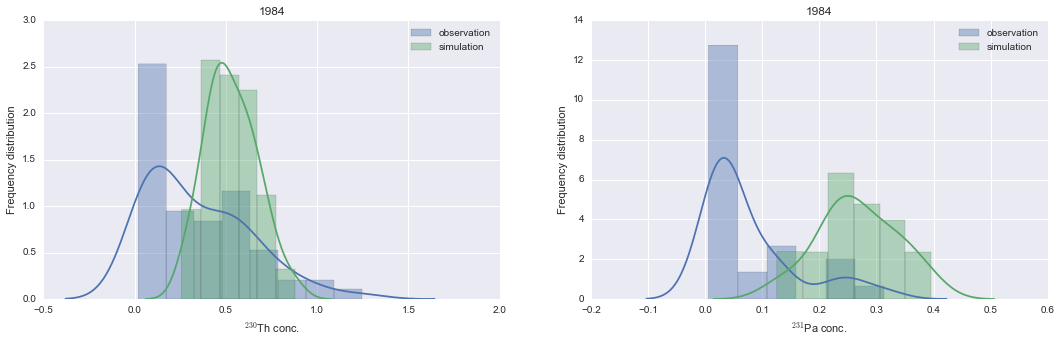

(62,) (60,)


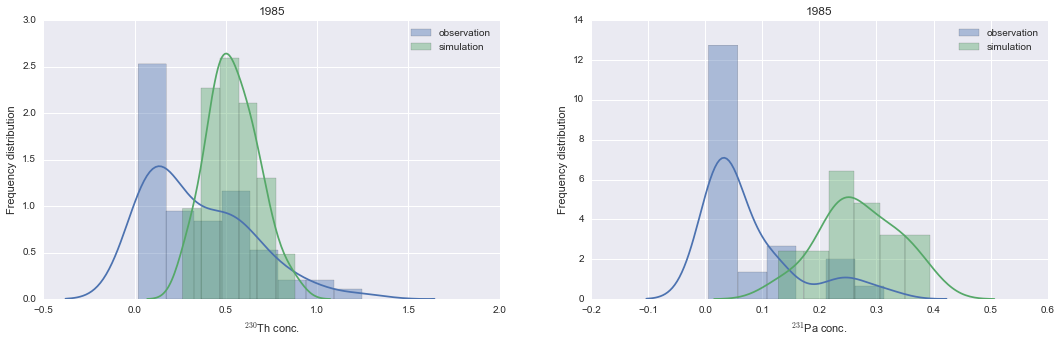

(62,) (60,)


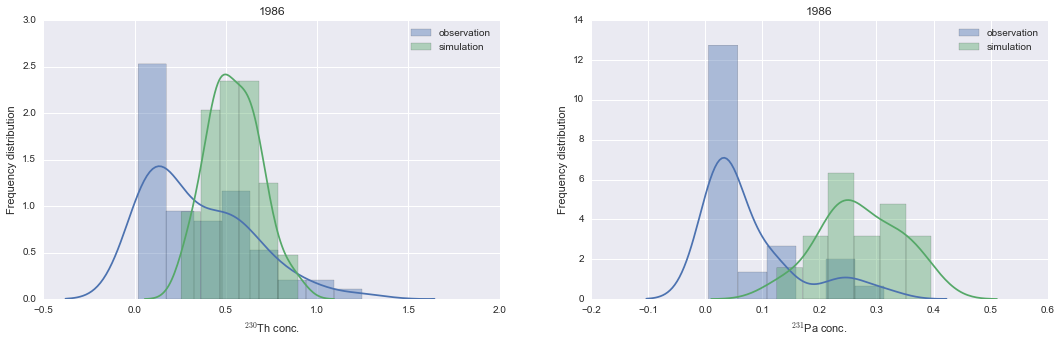

(62,) (60,)


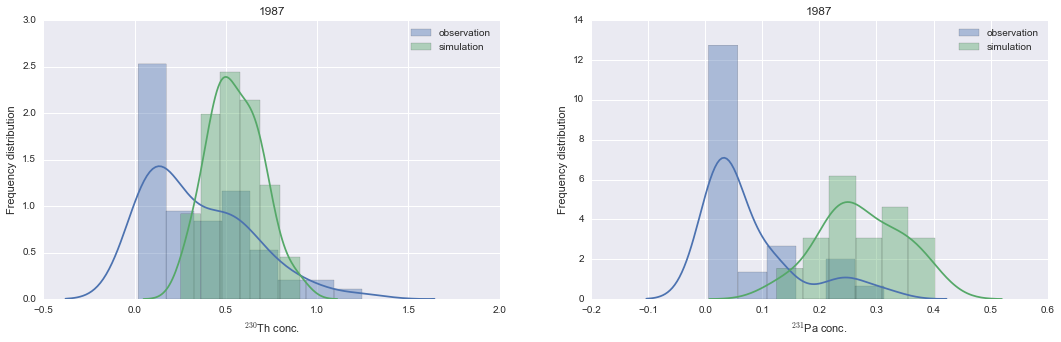

(62,) (60,)


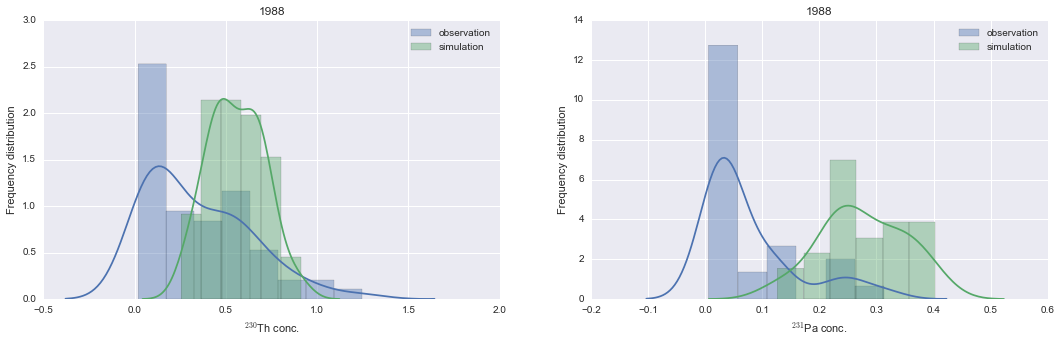

(62,) (60,)


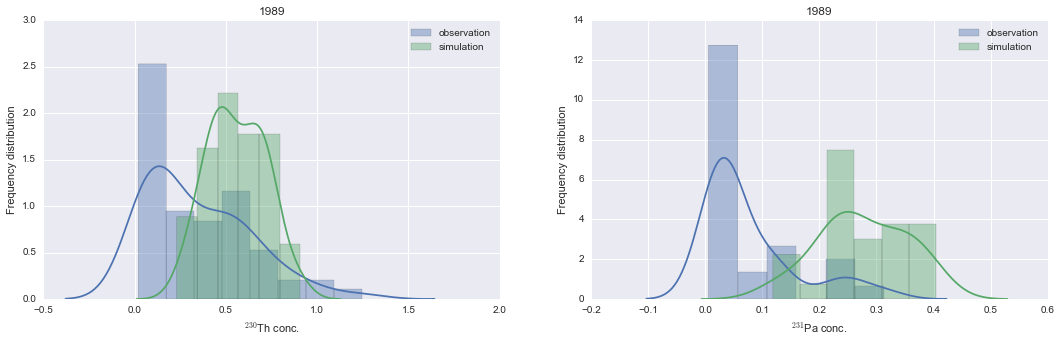

(62,) (60,)


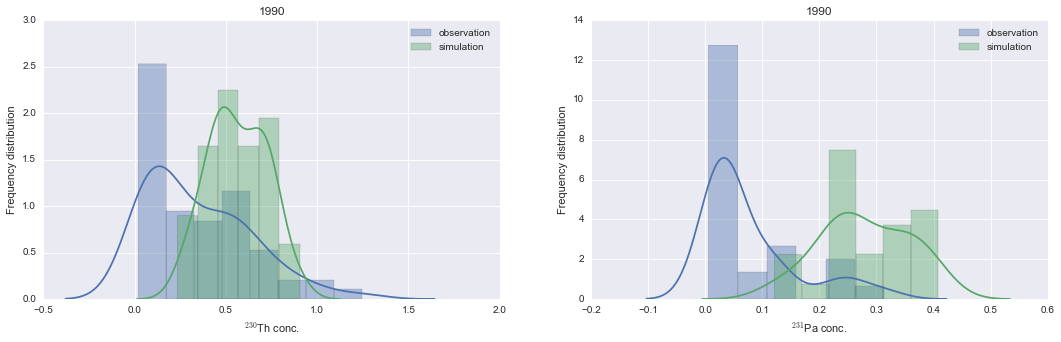

(62,) (60,)


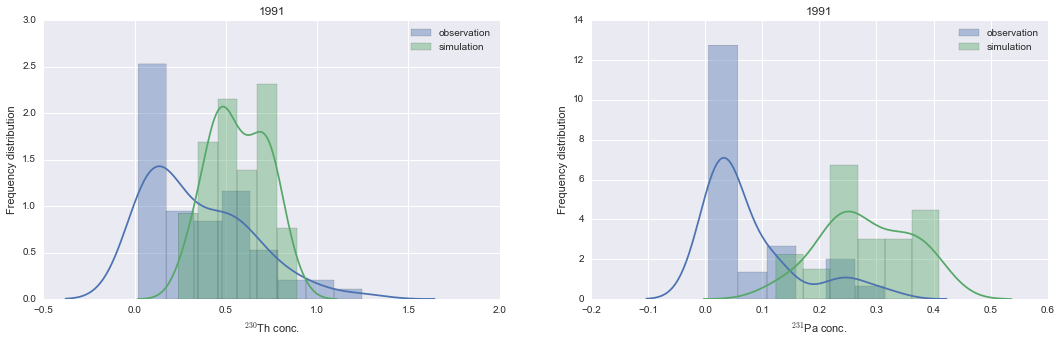

(62,) (60,)


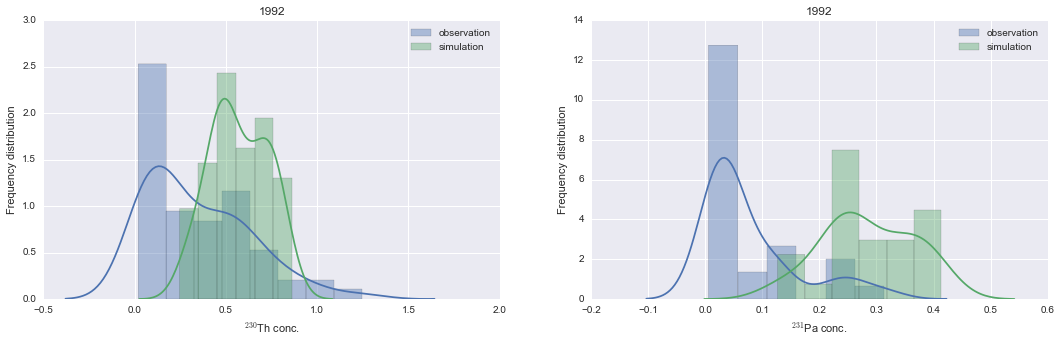

(62,) (60,)


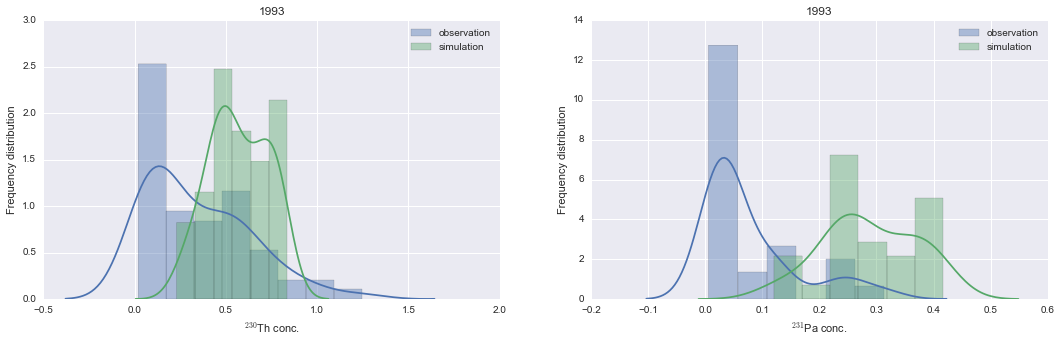

(62,) (60,)


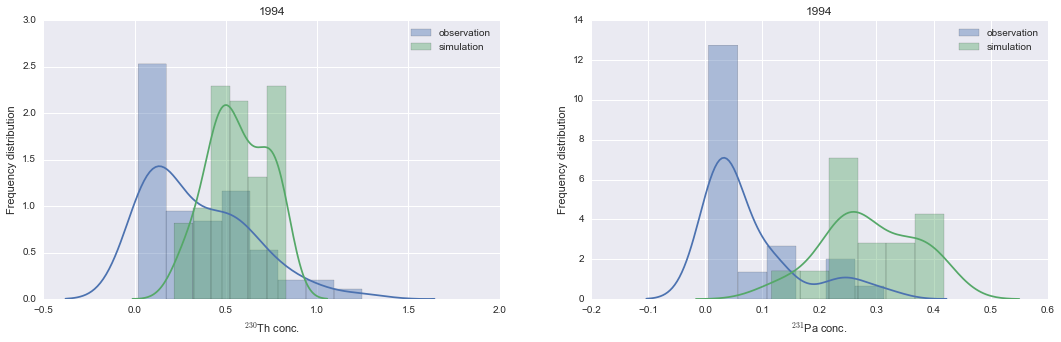

(62,) (60,)


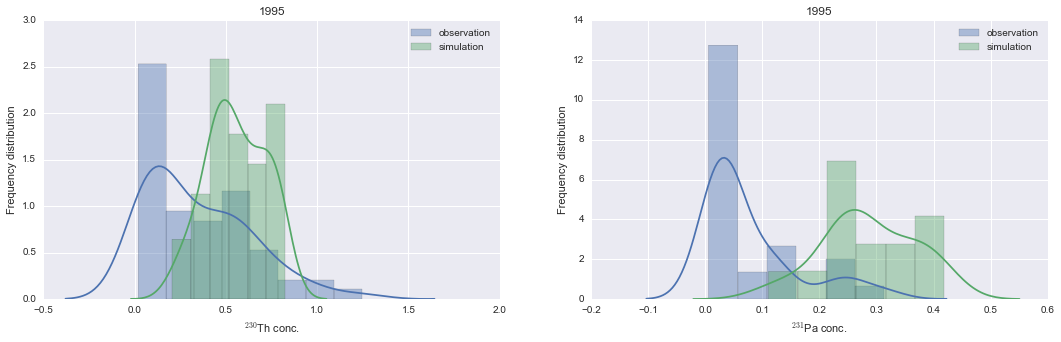

(62,) (60,)


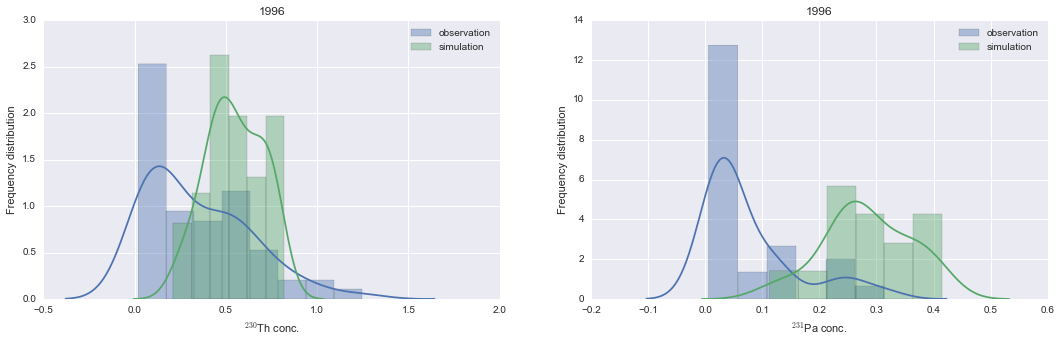

(62,) (60,)


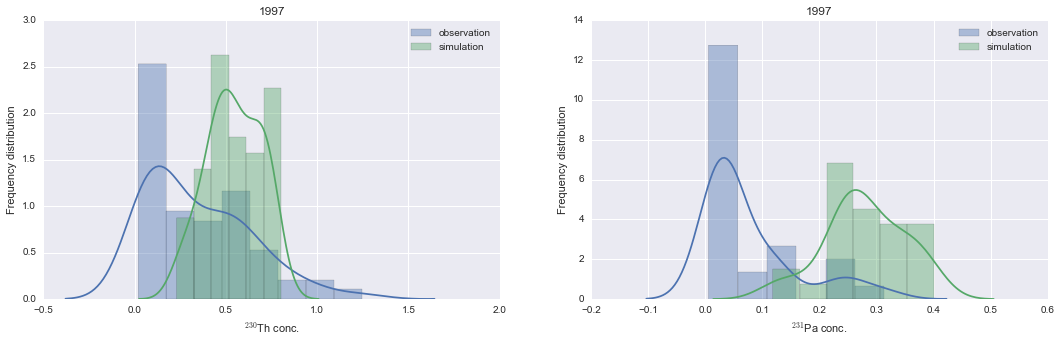

(62,) (60,)


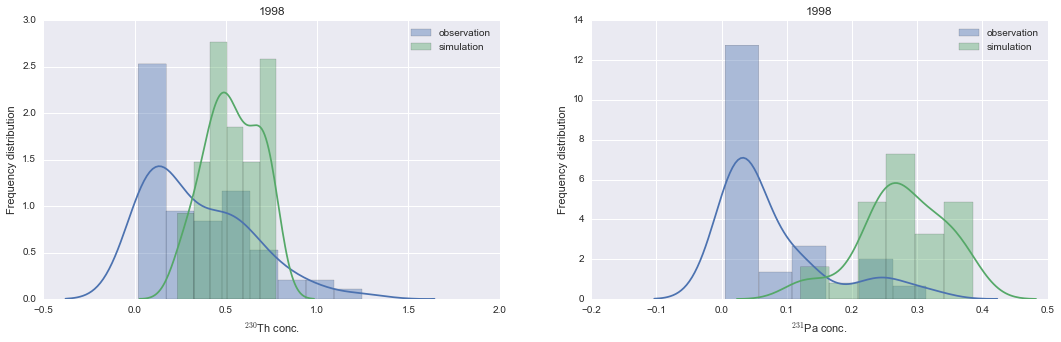

(62,) (60,)


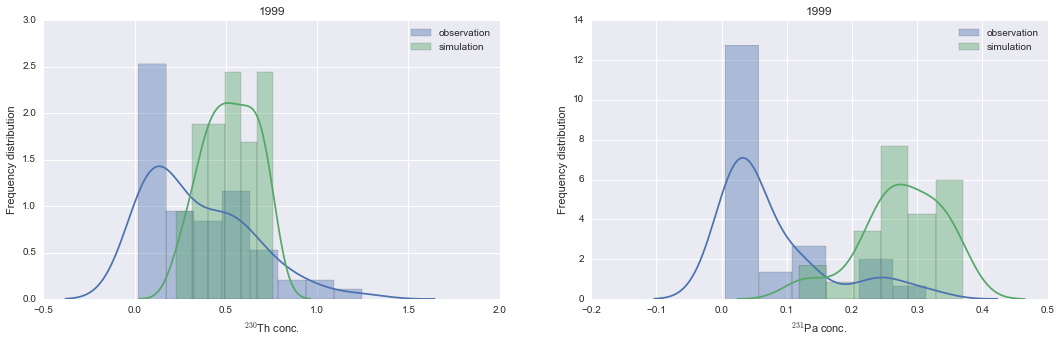

(62,) (60,)


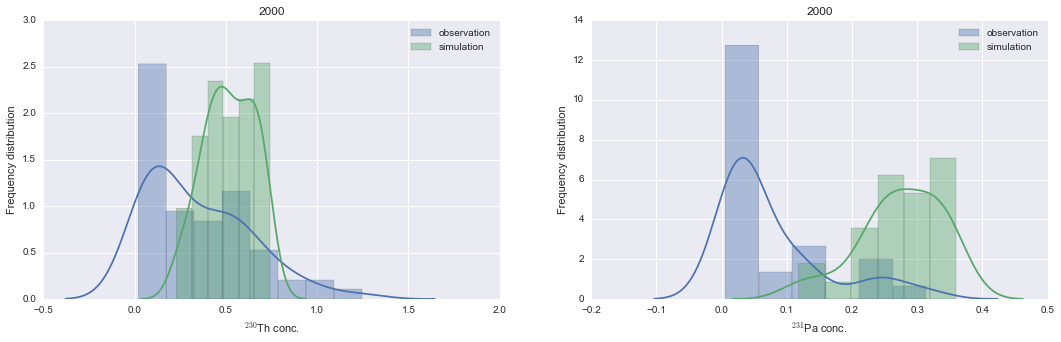

In [237]:
for k in range (yearnum-2):
    fig= plt.figure(figsize=(18,5))
    ax1=plt.subplot(121)
    ax1=thhist(yearnum=k,ax=ax1)
    ax2=plt.subplot(122)
    ax2=pahist(yearnum=k,ax=ax2)
    plt.show()

# Th on ALHA RIDGEE

In [40]:
y_=[];x_=[];lon_=[];lat_=[]
allmdel=[];modeldepth=[] 

for j in range(2):
    #observation
    if j==0:
        kx = x0
        ky = y0
    else:
        kx = x1
        ky = y1
    for i in range (len(kx)):
        y_.append(ky[i]);x_.append(kx[i])
               
    for i in [20]:
        model=datasrc(i,a=a[j],b=b[j],key1='TR_8',key2='TR_10')
        #model=np.ma.masked_where(model==0,model)
        for j in range (len(x_)):
            #interpolation
                obsdep=y_[j]
                allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)

In [41]:
data1=np.array((x_,y_))
data2=np.array((allmdel[:],modeldepth))

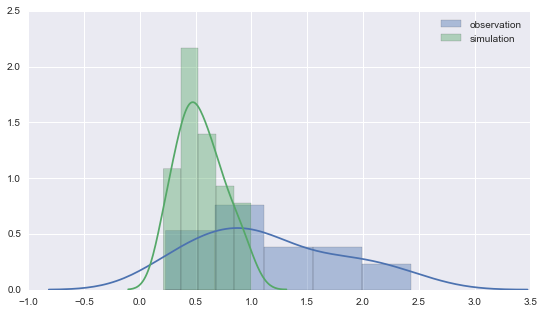

In [42]:
fig= plt.figure(figsize=(9,5))
sns.distplot(data1[0,:],bins=5,label='observation');
sns.distplot(data2[0,:],bins=5,label='simulation');
plt.legend()
#plt.ylim(0,9)

# ALL Th

In [43]:
y_=[];x_=[];lon_=[];lat_=[]
allmdel=[];modeldepth=[] 
for j in range(len(nc_filename)):
    #read observation
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            ytemp_.append(y[i]);xtemp_.append(x[i])
               
    if j <3:
        for i in [21]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
            for j in range (len(x_)):
            #interpolation
                obsdep=y_[j]
                allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)
    else:
        for i in [26]:
            model=datasrc(i,a=a[j+2],b=b[j+2],key1='TR_8',key2='TR_10')
            for j in range (len(x_)):
            #interpolation
                obsdep=y_[j]
                allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)
for j in range(2):
    #observation
    if j==0:
        kx = x0
        ky = y0
    else:
        kx = x1
        ky = y1
    for i in range (len(kx)):
        y_.append(ky[i]);x_.append(kx[i])
               
    for i in [20]:
        model=datasrc(i,a=a[j],b=b[j],key1='TR_8',key2='TR_10')
        #model=np.ma.masked_where(model==0,model)
        for j in range (len(x_)):
            #interpolation
                obsdep=y_[j]
                allmdel,modeldepth=interp(obsdep,dep,model,allmdel,modeldepth)

In [44]:
data1th=np.array((x_,y_))
data2th=np.array((allmdel[:],modeldepth))

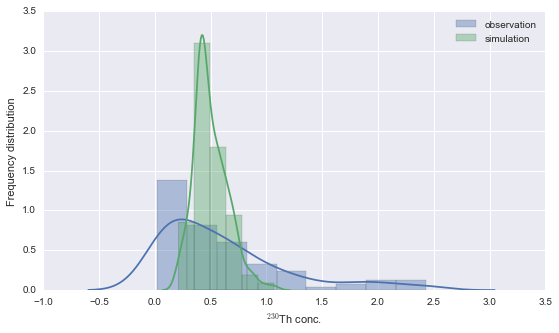

In [45]:
fig= plt.figure(figsize=(9,5))
sns.distplot(data1th[0,:],label='observation');
sns.distplot(data2th[0,:],bins=6,label='simulation');
plt.xlabel('$^{230}$Th conc.')
plt.ylabel('Frequency distribution')
plt.legend()